In [22]:
import sklearn
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

## 복습

In [9]:
import pydataset 
dia=pydataset.data('diamonds')
dia[:1]

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [21]:
#train_test_split
x= dia[['carat','depth','table','price','x','y','z']]
y=dia['cut']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)
pred=dt_clf.predict(x_test)
accuracy_score(pred,y_test)

0.7064021752564578

In [28]:
#gridsearchcv
x= dia[['carat','depth','table','price','x','y','z']]
y=dia['cut']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
dt_clf=DecisionTreeClassifier()
grid_parameter = {'max_depth':[1,2,3,4,5,6,7],'min_samples_split':[1,2], 'min_samples_leaf':[1,2,3,4]} 
grid_dt_clf=GridSearchCV(dt_clf,param_grid=grid_parameter, cv=5, refit=True)
grid_dt_clf.fit(x_train,y_train)

grid_dt_clf.best_params_ #최적의 파라미터
scores=pd.DataFrame(grid_dt_clf.cv_results_)# df 로 다 각각의 파라미터 보여줌 
scores


{'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 1}

In [33]:
estimator= grid_dt_clf.best_estimator_
pred= estimator.predict(x_test)
accuracy_score(y_test,pred)

0.7373625015449264

In [40]:
dia['cut']=dia['cut'].astype('category')
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
dt_clf=DecisionTreeClassifier()
grid_parameter = {'max_depth':[1,2,3,4,5,6,7],'min_samples_split':[1,2], 'min_samples_leaf':[1,2,3,4]} 
grid_dt_clf=GridSearchCV(dt_clf,param_grid=grid_parameter, cv=5, refit=True)
grid_dt_clf.fit(x_train,y_train)
estimator= grid_dt_clf.best_estimator_
pred= estimator.predict(x_test)
accuracy_score(y_test,pred)

0.7373625015449264

In [55]:
air=pydataset.data('airquality')
air.isnull().sum()
air=air.fillna('0')
air['season'] = pd.Categorical.from_codes(iris['target'], load_iris()['target_names']

In [51]:
air['Month'].unique()
air['season']=np.where(air[' ) 

AttributeError: 'Series' object has no attribute 'query'

In [59]:
air['season'] =air['Month'].replace({5:'spring',6:'spring',7:'summer',8:'summer',9:'summer'}) 
air[:1]
air['season']=air['season'].astype('category')

In [75]:
x=air[['Ozone',	'Solar.R',	'Wind',	'Temp']]
y=air['season']
x_train,x_test,y_train,y_test=train_test_split(x,y)
dtree=DecisionTreeClassifier()
grid_parameter = {'max_depth':[1,2,3,4,5,6,7],'min_samples_split':[2,3,4],
                  'min_samples_leaf':[1,2,3,4]} 
grid_dt_clf=GridSearchCV(dtree,param_grid=grid_parameter, cv=5, refit=True)
grid_dt_clf.fit(x_train,y_train)
estimator= grid_dt_clf.best_estimator_
pred= estimator.predict(x_test)
acc=accuracy_score(y_test,pred)
print(f'테스트 정확도:{acc:.4f}')

테스트 정확도:0.7949


In [85]:
items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder().fit(items)
labels = encoder.transform(items)
labels
encoder.classes_
encoder.inverse_transform

<bound method LabelEncoder.inverse_transform of LabelEncoder()>

In [86]:
encoder.fit_transform(items)

array([0, 1, 4, 5, 3, 3, 2, 2], dtype=int64)

In [93]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
items=np.array(items).reshape(-1,1) #세로 한줄로 쭉 정렬 

oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

oh_labels

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


<8x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [91]:
df =pd.DataFrame({'item':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [108]:

items=np.array(dia['cut']).reshape(-1,1) #세로 한줄로 쭉 정렬 
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)
oh_labels=oh_labels.toarray()




In [101]:
df={dia['cut']:['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']}
pd.get_dummies(df)

TypeError: unhashable type: 'Series'

In [98]:
dia['cut'].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']

In [112]:
x= dia[['carat','depth','table','price','x','y','z']]
y=oh_labels
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
dt_clf=DecisionTreeClassifier()
grid_parameter = {'max_depth':[1,2,3,4,5,6,7],'min_samples_split':[1,2], 'min_samples_leaf':[1,2,3,4]} 
grid_dt_clf=GridSearchCV(dt_clf,param_grid=grid_parameter, cv=5, refit=True)
grid_dt_clf.fit(x_train,y_train)

estimator=grid_dt_clf.best_estimator_
pred=estimator.predict(x_test)
accuracy_score(y_test,pred)

0.710727969348659

In [141]:
from sklearn.preprocessing import StandardScaler
iris=load_iris()
iris_df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.mean()
iris_standard=((iris_df-iris_df.mean())/iris_df.std())
#표준화 
scaler=StandardScaler() #객체 생성 
#fit , transform 
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)
#transform에서 scale 데이터 세트가 np.ndarray 로 반환되니까 df로 변경 
iris_scaled_df=pd.DataFrame(iris_scaled,columns=iris.feature_names)

print(iris_scaled.mean())
print(iris_scaled.var())

-1.4684549872375404e-15
1.0


In [143]:
iris_scaled[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [150]:
np.np.daray9'])

AttributeError: module 'numpy' has no attribute 'aray'

In [153]:
#(iris_df-iris_df.min(axis=0)) / (iris_df.max(0)-iris_df.min(0))

#Min_Max_Scaler
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

iris_set = load_iris()
iris_data = iris_set.data
irisDF = pd.DataFrame(data=iris_data, columns=iris_set.feature_names)

scaler = MinMaxScaler() #객체 생성 
scaler.fit(irisDF) #scaler로 데이터세트 변환. fit , transform 호출
iris_scaled = scaler.transform(irisDF)

#transform()시 스케일 변환된 데이터 세트가 Numpy ndarry로 반환돼 이를 DataFrame으로 변환
irisDF_scaled = pd.DataFrame(data=iris_scaled, columns=iris_set.feature_names)
print(irisDF_scaled.min())
print(irisDF_scaled.max())

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


#titanic 생존자 예측

In [157]:
import os
os.getcwd()

'C:\\Users\\user\\test'

In [160]:
ti=pd.read_csv('titanic (2)/train.csv')
ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [161]:
#결측치
ti.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [165]:
#칼럼이름 소문자
ti.columns=ti.columns.str.lower()
#결측치 채우기 
ti['age'].fillna(ti['age'].mean(),inplace=True)
ti['cabin'].fillna('N',inplace=True)
ti['embarked'].fillna('N',inplace=True)
ti


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [166]:
ti['cabin']

0         N
1       C85
2         N
3      C123
4         N
       ... 
886       N
887     B42
888       N
889    C148
890       N
Name: cabin, Length: 891, dtype: object

In [173]:
#cabin의 첫글자만 저장 
ti['cabin']=ti['cabin'].str[0]
ti['cabin']=list(map(lambda x: x[0], ti['cabin'])) 

<Axes: >

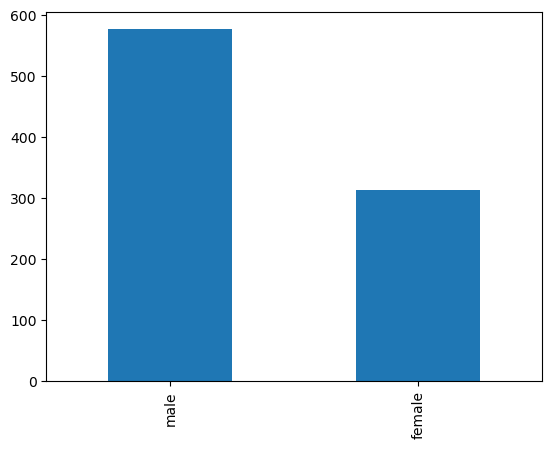

In [182]:
ti['sex'].value_counts().plot(kind='bar')

<Axes: xlabel='sex', ylabel='survived'>

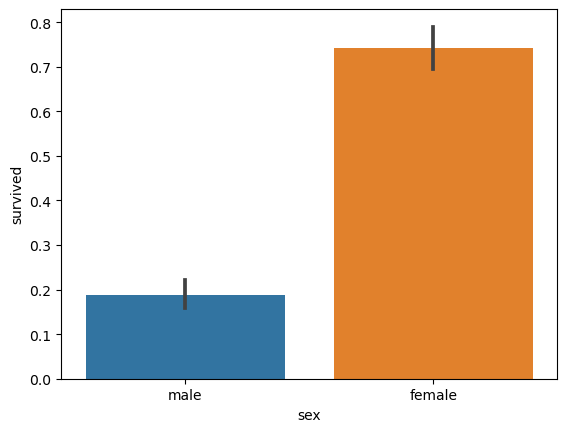

In [185]:
#생존자의 남녀 그래프
import seaborn as sns
sns.barplot(ti,x='sex',y='survived')

<Axes: xlabel='pclass', ylabel='survived'>

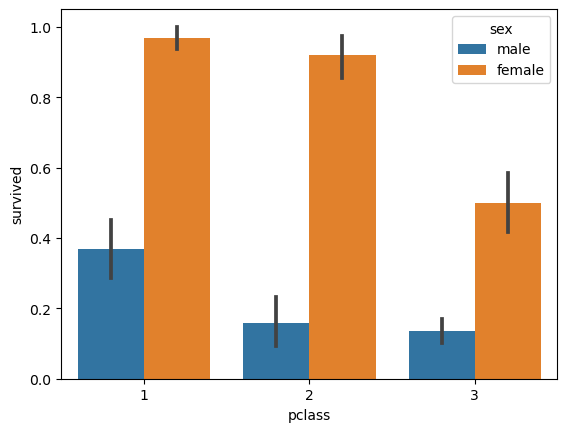

In [187]:
sns.barplot(ti,x='pclass',y='survived', hue='sex')

In [189]:
#살아날 학률
ti['survived'].mean()

0.3838383838383838

In [202]:
ti['age'].astype('category')

bins = [-np.inf,5,12,18,25,35,60,np.inf]
label = ['baby', 'child', 'teenager', 'student', 'young adult', 'adult', 'elderly']
ti['age_cat'] = pd.cut(ti['age'], bins, labels = label)
ti[:2]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C,C,adult


<Axes: xlabel='age_cat', ylabel='survived'>

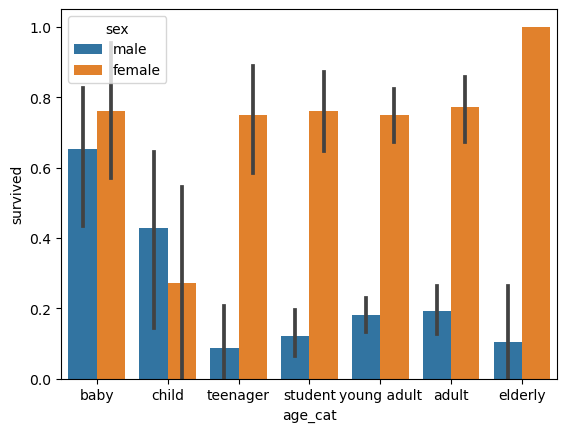

In [203]:
#age_Cat 별로 남녀별 생존 
sns.barplot(data=ti, x='age_cat', y='survived', hue='sex')

<Axes: xlabel='sex', ylabel='survived'>

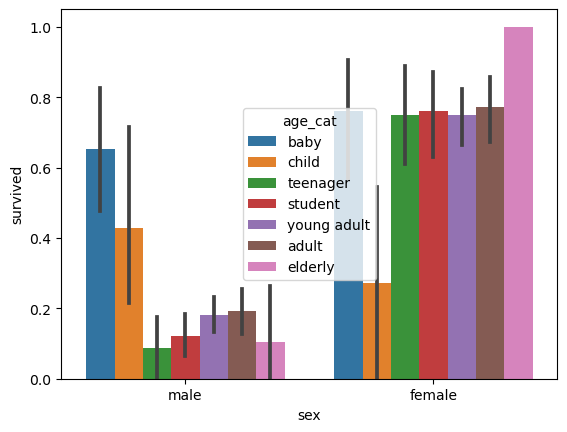

In [204]:
sns.barplot(data=ti, x='sex', y='survived', hue='age_cat')

In [205]:
# 정규화

In [271]:
from sklearn.preprocessing import LabelEncoder
def encodefea(ti):
    features=['sex','cabin','embarked']
    for feature in features:
        le=LabelEncoder()
        le=le.fit(ti[feature])
        ti[feature]=le.transform(ti[feature])
    return ti
ti_df= encodefea(ti)

In [222]:
from sklearn.preprocessing import LabelEncoder
l= LabelEncoder()
ti['sex'] =l.fit_transform(ti['sex'])
ti['cabin'] = l.fit_transform(ti['cabin'])
ti['embarked'] =l.fit_transform(ti['embarked']) 
ti[:1]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,7,3,student


In [223]:
ti.drop(['passengerid','name','ticket','age_cat'],axis=1,inplace =True)

In [257]:
x=ti.iloc[:,1:]
y=ti['survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
dt_clf=DecisionTreeClassifier()
grid_parameter = {'max_depth':[5,6,7],'min_samples_split':[1,2], 'min_samples_leaf':[1,2,3,4]} 
grid_dt_clf=GridSearchCV(dt_clf,param_grid=grid_parameter, cv=5, refit=True)
grid_dt_clf.fit(x_train,y_train)

estimator=grid_dt_clf.best_estimator_
pred=estimator.predict(x_test)
accuracy_score(y_test,pred)

0.8171641791044776

In [258]:
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
pred=dt_clf.predict(x_test)
accuracy_score(y_test,pred)

0.7798507462686567

In [259]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [269]:
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)
pred=rf_clf.predict(x_test)
accuracy_score(y_test,pred)

0.8171641791044776

In [266]:
#로지스틱은 교차검증과 사용할 수없음 탭열어서 있는것들을 봐야댐

lr_clf=LogisticRegression(solver='liblinear')
lr_clf.fit(x_train,y_train)
pred=lr_clf.predict(x_test)
accuracy_score(y_test,pred)

0.8134328358208955

In [270]:
#random 과 교차검증 합친것 

x=ti.iloc[:,1:]
y=ti['survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
rf_clf=RandomForestClassifier()
grid_parameter = {'max_depth':[5,6,7],'min_samples_split':[1,2], 'min_samples_leaf':[1,2,3,4]} 
grid_dt_clf=GridSearchCV(rf_clf,param_grid=grid_parameter, cv=5, refit=True)
grid_dt_clf.fit(x_train,y_train)

estimator=grid_dt_clf.best_estimator_
pred=estimator.predict(x_test)
accuracy_score(y_test,pred)

0.835820895522388